### 01. 분류 (Classification)의 개요

- 나이브 베이즈 (Naive Bayes) : 베이즈(Bayes) 통계와 생성 모델에 기반
- 로지스틱 회귀 (Logistic Regression) : 독립변수와 종속변수의 선형 관계성에 기반
- 결정 트리 (Decision Tree) : 데이터 균일도에 따른 규칙 기반
- 서포트 벡터 머신 (Support Vector Machine) : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌
- 최소 근접 (Nearest Neighbor) : 근접 거리 기준
- 신경망 (Neural Network) : 심층 연결 기반
- 앙상블 (Ensemble) : 서로 다른 (또는 같은) 머신러닝 알고리즘 결합

-----
### 02. 결정 트리

- 결정 트리 (Decision Tree) : 학습을 통해 규칙을 자동으로 찾아내 트리(Tree) 기반의 분류 규칙 생성
    - *어떤 기준* 을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가!

- 깊이(depth)가 깊어질수록 결정 트리의 *예측 성능 저하* 가능성 높음

- 정보 균일도가 높은 데이터 셋을 먼저 선택할 수 있도록 규칙 조건 생성하여 서브 데이터셋 생성
- 균일도가 높은 자식 데이터 셋을 쪼개는 방식 반복하며 데이터 값 예측

- 정보 균일도 측정
    - 정보 이득 (Information Gain) : 엔트로피(데이터의 혼잡도) 개념 기반. 서로 다른 값이 섞여 있으면 엔트로피 ↑, 서로 같은 값이 섞여 있으면 엔트로피 ↓. 정보 이득 지수 = 1 - 엔트로피 지수. 결정 트리는 정보 이득 지수로 분할 기준을 정함. 즉, 정보 이득이 높은 속성을 기준으로 분할
    - 지니 계수 : 0이 가장 평등, 1로 갈수록 불평등. 머신러닝에 적용될 때에는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석함. 지니 계수가 낮은 속성을 기준으로 분할

#### 결정 트리 모델의 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') # 일치하는 경고를 인쇄하지 않음

In [2]:
## DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

In [4]:
## 붓꽃 데이터셋 로딩 및 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = .2, random_state = 11)

In [5]:
## DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [6]:
from sklearn.tree import export_graphviz

In [7]:
## export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)

In [8]:
import graphviz

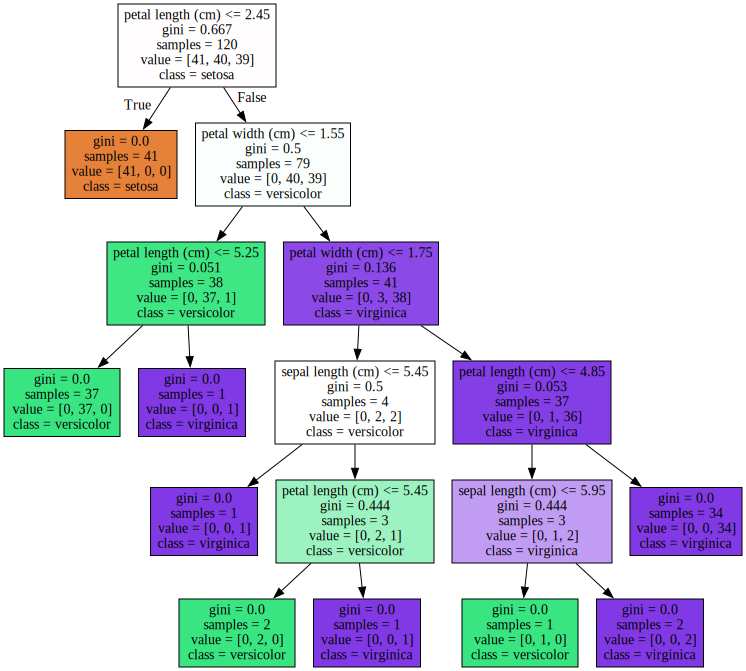

In [9]:
## 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open("tree.dot") as f :
    dot_graph = f.read()

graphviz.Source(dot_graph)

- `max_depth` : 트리 깊이를 줄이면 더 간단한 결정 트리가 됨
- `min_samples_split` : 자식 규칙 노드를 분할해 만들기 위한 *최소한의 샘플 데이터 개수*. 예를 들어 `min_samples_split = 4`로 설정한다면, sample 수가 3개인 경우 더 이상 분할하지 않고 리프 노드가 됨.
- `min_samples_leaf` : 리프 노드가 될 수 있는 *샘플 데이터 건수의 최솟값*. 디폴트 값으로 1이고, 이는 단독 클래스이거나 단 한개의 데이터로 돼 있을 경우에 리프 노드가 될 수 있음. 값을 키우면 리프 노드가 될 수 있는 조건이 완화됨. 지니 계수가 크더라도 규칙이 변경되어 브랜치 노드가 줄어들고 결정 트리가 더 간결해짐.

In [10]:
import seaborn as sns
import numpy as np
%matplotlib inline

Feature importances : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

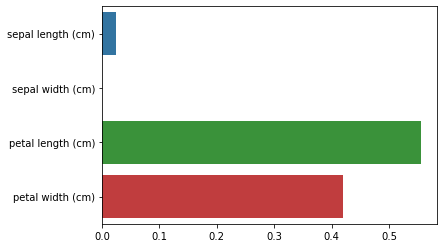

In [12]:
## feature importance 추출
print("Feature importances : \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

## feature별 importance mapping
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_) :
    print('{0} : {1:.3f}'.format(name, value))

## feature importance를 column 별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

#### 결정 트리 과적합 (Overfitting)

In [13]:
from sklearn.datasets import make_classification # 분류를 위한 테스트용 데이터 쉽게 생성
import matplotlib.pyplot as plt
%matplotlib inline

- `make_classification`
    - `n_features` : 독립 변수의 수
    - `n_redundant` : 독립 변수 중, 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
    - `n_informative` : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수
    - `n_classes` : 종속 변수의 클래스 수
    - `n_clusters_per_class` : 클래스 당 클러스터의 수

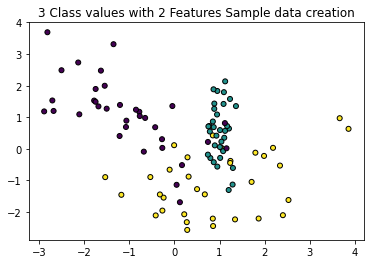

In [18]:
plt.title("3 Class values with 2 Features Sample data creation")

## 2차원 시각화를 위해서 피처는 2개, 클래느는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_classes = 3, n_clusters_per_class = 1, random_state = 0)

## 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, edgecolor = 'k')

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k', clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                        levels=np.arange(n_classes + 1) - 0.5,
                        cmap='rainbow', clim=(y.min(), y.max()),
                        zorder=1)

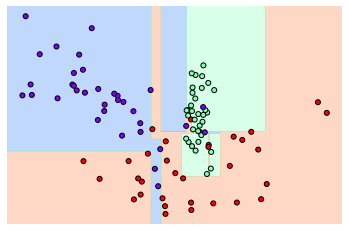

In [22]:
## 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

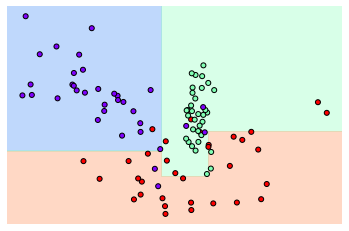

In [23]:
## 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6, random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

#### 결정 트리 실습 - 사용자 행동 인식 데이터 셋

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## 피처 이름 index와 피처명을 DataFrame으로 로드
feature_name_df = pd.read_csv('human_activity/features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name']) # \s+ : 한 개 이상 공백으로 구분

## 피처명 index 제거 후, 리스트 객체로 생성하여 샘플로 10개 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출 : ', feature_name[:10])

전체 피처명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [5]:
## 중복 피처명 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count()) # column_index가 1개 이상이면 중복

feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [6]:
## 중복 피처명에 새로운 피처명을 가지게 함
def get_new_feature_name_df(old_feature_name_df) :
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt']) # 몇번째로 중복된 데이터인지 확인 (cumcount가 0이면 중복되지 않음)
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1])
                                                                                                if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

In [7]:
## 데이터셋을 DataFrame으로 생성하는 함수
def get_human_dataset() :
    feature_name_df = pd.read_csv('human_activity/features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])

    ## 중복 피처명 수정 함수 사용하여 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    ## DataFrame에 피처명을 column으로 부여하기 위하여 리스트 객체로 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    ## 학습 피처 데이터 셋과 테스트 피처 데이터를 DataFrame으로 로딩
    X_train = pd.read_csv('human_activity/train/X_train.txt', sep = '\s+', names = feature_name )
    X_test = pd.read_csv('human_activity/test/X_test.txt', sep = '\s+', names = feature_name)

    ## 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 
    y_train = pd.read_csv('human_activity/train/y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt', sep = '\s+', header = None, names = ['action'])

    ## 로드된 학습/테스트용 DataFrame 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [6]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


- 모든 속성이 `float` 형이므로 카테고리 인코딩 수행하지 않아도 됨

In [7]:
X_train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


- 모든 레이블의 분포도는 비교적 고르게 분포되어 있음

In [8]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [11]:
## 기본 하이퍼파라미터 사용
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8548


In [12]:
## DecisionTreeClassifier의 하이퍼파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼파라미터 : \n', dt_clf.get_params())

DecisionTreeClassifier 기본 하이퍼파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
## DecisionTree의 max_depth가 예측 정확도에 주는 영향
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16]
}

# verbose = 0 : 수행 결과 메세지 출력하지 않음
# verbose = 1 : 수행 결과 간단한 메세지 출력
# verbose = 2 : 수행 결과 하이퍼파라미터별 메세지 출력
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [15]:
## max_depth 값에 따라 변화하는 예측 성능 확인
## GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

## max_depth 파라미터 값과 그때의 테스트 셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [16]:
## max_depth 값을 변화시키면서, 학습과 테스트 셋에서의 예측 성능 측정
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths :
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8551
max_depth = 8 정확도 : 0.8717
max_depth = 10 정확도 : 0.8599
max_depth = 12 정확도 : 0.8571
max_depth = 16 정확도 : 0.8599
max_depth = 20 정확도 : 0.8565
max_depth = 24 정확도 : 0.8565


In [17]:
## max_depth와 min_samples_split 같이 튜닝
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


- `best_estimator_` : 최적 하이퍼파라미터로 학습이 완료된 Estimator 객체

In [20]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)

print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8717


In [19]:
import seaborn as sns

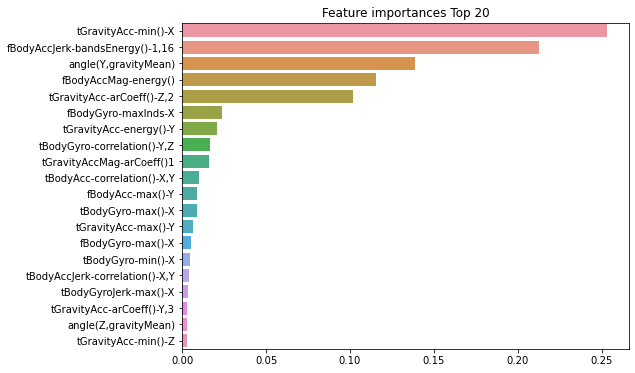

In [21]:
## 각 피처의 중요도 확인
ftr_importances_values = best_df_clf.feature_importances_

## Top 중요도로 정렬 후 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

## 중요도 순으로 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

-----
### 03. 앙상블 학습

#### 앙상블 학습 개요

- 보팅(Voting) & 배깅(Bagging) : 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
    - 보팅 (Voting) : 서로 다른 알고리즘을 가진 분류기 결합
    - 배깅 (Bagging) : 모두 같은 유형의 알고리즘 기반, 데이터 샘플링을 서로 다르게 함 / 부트스트래핑(Bootstrapping, 개별 분류기에게 데이터를 샘플링 해서 추출하는 방식)의 데이터 셋에서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해 최종 예측 결과를 선정 / 중첩을 허용
- 부스팅(Boosting) : 여러 개의 분류기가 순차적으로 학습을 수행하되 다음 분류기에는 가중치(weight)를 부여
- 스태킹(Stacking) : 여러 모델의 예측 결괏값을 다시 학습 데이터로 생성하여 다른 모델에 재학습시켜 결과를 예측

#### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

- 하드 보팅 (Hard Voting) : 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
- 소프트 보팅 (Soft Voting) : 레이블 값 결정 확률을 모두 더하고, 이를 평균하여 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

- 소프트 보팅이 예측 성능이 더 좋아 일반적으로 더 많이 사용함

#### 보팅 분류기 (Voting Classifier)

In [23]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [26]:
## 개별 모델로 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors = 8)

## 개별 모델을 소프트 보팅 기반 앙상블 모델로 구현
# voting 기본 값은 hard
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

## VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)

print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

## 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]

for classifier in classifiers :
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


-----
### 04. 랜덤 포레스트

#### 랜덤 포레스트의 개요 및 실습

- 여러 개의 결정트리 분류기가 전체 데이터에서 배깅(Bagging) 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤, 최종적으로 모든 분류기가 보팅(Voting)을 통해 예측 결정

- 개별 트리가 학습하는 데이터셋은 전체 테이터에서 일부가 중첩되게 샘플링된 데이터 셋

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [10]:
X_train, X_test, y_train, y_Test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state = 0, max_depth = 8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도 : 0.9196


#### 랜덤 포레스트 하이퍼파라미터 및 튜닝

- `n_estimators` : 결정 트리의 개수 지정. default = 10. 값이 커질수록 좋은 성능을 기대할 수 있지만, 성능이 무조건 향상되는 것은 아니며 학습 수행 시간이 오래 걸림.
- `max_features` : 트리를 분할하는 피처를 sqrt(전체 피처 개수)만큼 참조함.

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
params = {
    'max_depth' : [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

## RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# n_jobs = -1 설정 시, 모든 CPU 코어 이용하여 학습
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼파라미터 : 
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도 : 0.9165


In [13]:
rf_clf1 = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 6, max_depth = 16, min_samples_split = 2, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)

print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9260


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

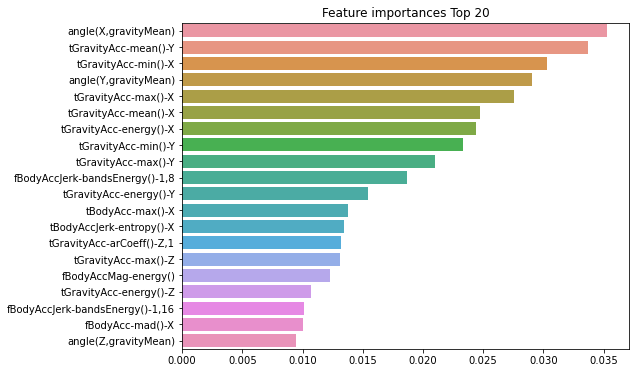

In [15]:
## feature 중요도 시각화
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

-----
### 05. GBM(Gradient Boosting Machine)

#### GBM의 개요 및 실습

- 경사 하강법 (Gradient Descent) 이용하여 가중치 업데이트 진행
- 오류 값 $h(x)$ = 실제 값 $y$ - 예측값 $F(x)$
- 위 오류식을 최소화 하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것이 경사 하강법

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

In [19]:
X_train, X_test, y_train, y_test = get_human_dataset()

## GBM 수행 시간 측정을 위한 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:.4f} 초 '.format(time.time() - start_time))

GBM 정확도 : 0.9389
GBM 수행 시간 : 526.2612 초 


#### GBM 하이퍼파라미터 소개

- `loss` : 경사 하강법에서 사용할 비용 함수 지정. default = 'deviance'
- `learning_rate` : 학습을 진행할 때마다 적용하는 학습률. 순차적으로 오류 값을 보정하며 적용하는 계수. default = 0.1이며 0~1 사이 값 지정 가능.
    - 작은 값을 지정하면, 최소 오류 값을 찾기 쉬워 예측 성능이 높아질 가능성이 있지만, 시간이 오래 걸림.
    - 큰 값을 지정하면 최소 오류 값을 찾지 못해 예측 성능이 떨어질 가능성이 있지만, 빠른 수행 가능.
    - `learning_rate`를 작게 하고, `n_estimators`를 크게 하면, 한계점까지 성능이 조금씩 좋아지지만 수행 시간이 오래 걸림.
- `n_estimators` : 약한 학습기 (weak learner)의 개수. 많아질수록 예측 성능이 좋아지지만 수행 시간이 오래 걸림. default = 100
- `subsample` : 학습에 사용하는 데이터의 샘플링 비율. default = 1 (전체 데이터 기반 학습). 과적합이 염려되는 경우, 1보다 작은 값으로 설정

-----
### 06. XGBoost(eXtra Gradient Boost)

#### 파이썬 래퍼 XGBoost 하이퍼파라미터

- 초기의 독자적인 XGBoost 프레임워크 기반의 XGBoost

**과적합 문제 심할 경우**
- `eta` 값을 0.01 ~ 0.1 정도로 낮춘다. 반대로 `num_round`(혹은 `n_estimators`)는 높여줘야 함.
- `max_depth` 값을 낮춘다.
- `min_child_weight` 값을 높인다.
- `gamma` 값을 높인다.
- `sumsample`과 `colsample_bytree`를 조정하는 것은 트리가 복잡하게 생성되는 것을 막는다.

In [1]:
import xgboost

In [2]:
print(xgboost.__version__)

1.7.1


#### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data = features, columns = dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [5]:
## label 값 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [6]:
## cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)

## train 데이터셋을 다시 학습용과 검증용으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [7]:
## 파이썬 래퍼 XGBoost의 전용 객체인 DMatrix로 변환
dtr = xgb.DMatrix(data = X_tr, label = y_tr)
dval = xgb.DMatrix(data = X_val, label = y_val)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [8]:
## XGBoost의 하이퍼파라미터는 주로 딕셔너리 형태로 입력
params = {'max_depth' : 3,
            'eta' : 0.05,
            'objective' : 'binary:logistic',
            'eval_metric' : 'logloss'}
num_rounds = 400

In [9]:
eval_list = [(dtr, 'train'), (dval, 'eval')] # 검증용 데이터셋만 명시해도 무방!

xgb_model = xgb.train(params =  params, dtrain = dtr, num_boost_round = num_rounds,
                        early_stopping_rounds = 50, evals = eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

- xgboost의 `predict()`는 예측 결과를 추정할 수 있는 *확률 값* 을 반환함

In [10]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

## 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시 : ', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시 :  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [9]:
## 예측 성능 평가 함수
def get_clf_eval(y_test, pred = None, pred_proba = None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test ,pred)
    f1 = f1_score(y_test, pred)

    ## ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)

    ## ROC-AUC print 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [13]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도 : 0.9561, 정밀도 : 0.9615, 재현율 : 0.974026, F1 : 0.9677, AUC : 0.9937


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

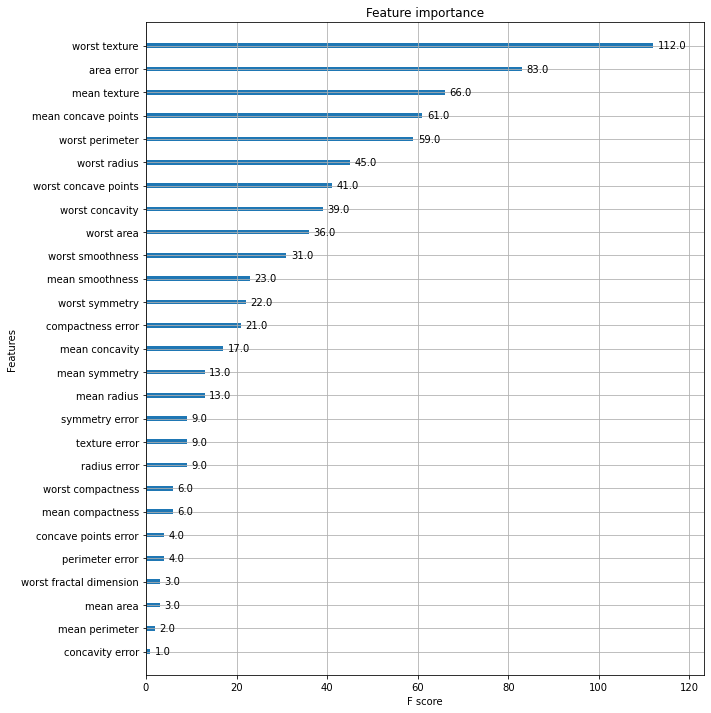

In [15]:
## f 스코어 (해당 feature가 트리 분할 시, 얼마나 자주 사용되었는지 지표로 나타낸 값) 기반으로 feature의 중요도 나타냄
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_model, ax = ax)

#### 사이킷런 래퍼 XGBoost의 개요 및 적용

In [16]:
from xgboost import XGBClassifier

In [18]:
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 3, eval_metric = 'logloss')
xgb_wrapper.fit(X_train, y_train, verbose = True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1] # 각 클래스에 대한 확률
# 왜 1열을 사용할까?? 모르겠음 ㅠㅠ

In [19]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도 : 0.9649, 정밀도 : 0.9620, 재현율 : 0.987013, F1 : 0.9744, AUC : 0.9954


In [20]:
xgb_wrapper= XGBClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = 3)
evals = [(X_tr, y_tr), (X_val, y_val)] # 학습용, 검증용 순
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = "logloss", eval_set = evals, verbose = True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

In [26]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도 : 0.9561, 정밀도 : 0.9615, 재현율 : 0.974026, F1 : 0.9677, AUC : 0.9933


- 조기 중단값을 급격하게 줄여버리면, 예측 성능이 저하될 수 있음

In [27]:
## early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = evals, verbose = True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52930
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31892	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

In [28]:
get_clf_eval(y_test ,ws10_preds, ws10_pred_proba)

오차 행렬
[[34  3]
 [ 3 74]]
정확도 : 0.9474, 정밀도 : 0.9610, 재현율 : 0.961039, F1 : 0.9610, AUC : 0.9933


-----
### 07. LightGBM

- 리프 중심 트리 분할 (Leaf Wise)
    - 트리의 균형을 맞추지 않고, 최대 손실 값 (max delta loss)을 가지는 리프 노드를 지속적으로 분할하며 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성
    - 예측 오류 손실 최소화 가능

#### LightGBM 적용 - 위스콘신 유방암 예측

In [2]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [6]:
dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
cancer_df['target'] = dataset.target

X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)

## train 데이터셋을 다시 학습용과 검증용으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 156)

lgbm_wrapper = LGBMClassifier(n_estimators = 400, learning_rate = 0.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = 'logloss', eval_set = evals, verbose = True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
Training until validation scores don't improve for 50 rounds
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334

In [12]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도 : 0.9561, 정밀도 : 0.9615, 재현율 : 0.974026, F1 : 0.9677, AUC : 0.9877


In [14]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

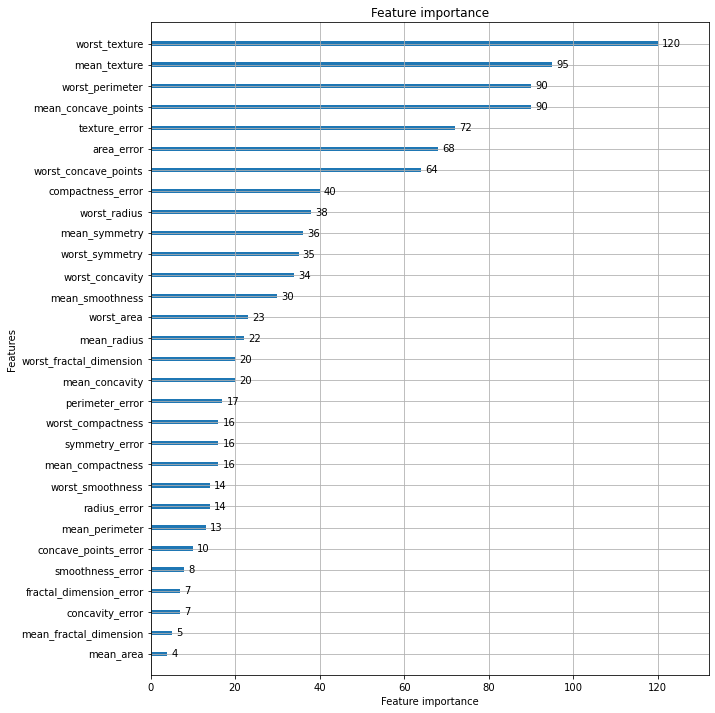

In [15]:
## feature 중요도 시각화
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm_wrapper, ax = ax)

-----
### 08. 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼파라미터 튜닝

#### 베이지안 최적화 개요

- 목적 함수 식을 제대로 알 수 없는 블랙박스 형태의 함수에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력값을 가능한 적은 시도를 통해 빠르고 효과적으로 찾아줌

- 새로운 데이터를 입력받았을 때 최적 함수를 예측하는 사후 모델을 개선해 나가며 최적 함수 모델을 만들어 냄
- 대체 모델 (Surrogate Model) : 획득 함수로부터 최적 함수를 예측할 수 있는 입력값을 추천받은 뒤(계산된 하이퍼파라미터를 입력받아) 이를 기반으로 최적 함수 모델을 개선함
- 획득 함수 (Acquisition Function) : 개선된 대체 모델을 기반으로 최적 입력값을 계산

#### HyperOpt 사용하기

- 목적 함수 반환 값이 *최소* 가 되는 최적 입력값을 유추함

In [1]:
# pip install hyperopt

  Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from hyperopt import hp

In [22]:
## -10~10까지 1 간격을 가지도록 (-15~15도 마찬가지)
search_space = {'x' : hp.quniform('x', -10, 10, 1), 'y' : hp.quniform('y', -15, 15, 1)}

In [23]:
from hyperopt import STATUS_OK

In [24]:
## 목적 함수 생성
def objective_func(search_space) :
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y

    return retval

In [25]:
from hyperopt import fmin, tpe, Trials
import numpy as np

In [26]:
## 입력 결괏값을 저장한 객체값 생성
trial_val = Trials()

## max_eval : 시도 횟수
best_01 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 5, trials = trial_val, rstate = np.random.default_rng(seed = 0)) # random Generator 생성 (일반적인 정수값 입력하지 않음)
print('best :', best_01)

100%|██████████| 5/5 [00:00<00:00, 1238.57trial/s, best loss: -224.0]
best : {'x': -4.0, 'y': 12.0}


In [27]:
## 입력 결괏값을 저장한 객체값 생성
trial_val = Trials()

best_02 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 20, trials = trial_val, rstate = np.random.default_rng(seed = 0))
print('best :', best_02)

100%|██████████| 20/20 [00:00<00:00, 1207.98trial/s, best loss: -296.0]
best : {'x': 2.0, 'y': 15.0}


In [28]:
## 함수의 반복 수행 시마다 반환되는 반환값
## max_evals가 20이므로, 20개의 딕셔너리를 개별 원소로 가지는 리스트로 구성
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [29]:
## 함수 수행 시마다 입력되는 입력 변숫값
## 20번의 반복 수행 시마다 사용되는 입력값들이 리스트 형태로 구성
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [30]:
import pandas as pd

In [31]:
## result에서 loss key 값에 해당하는 value들을 추출하여 list로 생성ㅇ
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

## DF로 생성
result_df = pd.DataFrame({'x' : trial_val.vals['x'], 'y' : trial_val.vals['y'], 'losses' : losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


#### HyperOpt를 이용한 XGBoost 하이퍼파라미터 최적화

In [32]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [33]:
dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
cancer_df['target'] = dataset.target

X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 156)

In [35]:
from hyperopt import hp

In [40]:
## hp.uniform 두 값 사이의 정규분포 된 값
xgb_search_space = {'max_depth' : hp.quniform('max_depth', 5, 20, 1),
                                'min_child_weight' : hp.quniform('min_child_weight', 1, 2, 1),
                                'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2),
                                'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1),}

- 검색 공간에서 목적 함수로 입력되는 인자들은 실수형 값이므로, 하이퍼파라미터 값으로 설정할 때 *정수형으로 형변환* 해주어야 함
- 값이 클수록 좋은 성능 지표는 (ex. 정확도) -1을 곱한 뒤 반환해주어야 함

In [37]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

- XGBoost와 LightGBM에 `cross_val_score()`을 적용할 경우 조기 중단(early stopping)이 지원되지 않음!
- 조기 중단을 하기 위해서는 KFold를 사용해야 함

In [45]:
def objective_func(search_space) :
    xgb_clf = XGBClassifier(n_estimators = 100, max_depth = int(search_space['max_depth']), # 실수형 → 정수형 형변환
                            min_child_weight = int(search_space['min_child_weight']), learning_rate = search_space['learning_rate'], colsample_bytree = search_space['colsample_bytree'], eval_metric = 'logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring = 'accuracy', cv = 3)

    ## accuracy는 cv 개수만큼 roc-auc 결과를 리스트로 가짐
    ## 값들을 평균해서 반환
    ## 최솟값을 최적화 하기 위하여 -1 곱해줌
    return {'loss' : -1 * np.mean(accuracy), 'status' : STATUS_OK}

In [46]:
from hyperopt import fmin, tpe, Trials

In [47]:
trial_val = Trials()

best = fmin(fn = objective_func, space = xgb_search_space, algo = tpe.suggest, max_evals = 50, trials = trial_val, rstate = np.random.default_rng(seed = 9))
print('best : ', best)

100%|██████████| 50/50 [00:07<00:00,  6.50trial/s, best loss: -0.9670616939700244]
best :  {'colsample_bytree': 0.5424149213362504, 'learning_rate': 0.12601372924444681, 'max_depth': 17.0, 'min_child_weight': 2.0}


In [48]:
print('colsample_bytree : {0}, learning_rate : {1}, max_depth : {2}, min_child_weight : {3}'.format(round(best['colsample_bytree'], 5), round(best['learning_rate'], 5), int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree : 0.54241, learning_rate : 0.12601, max_depth : 17, min_child_weight : 2


In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)

    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [51]:
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = round(best['learning_rate'], 5), max_depth = int(best['max_depth']),
                            min_child_weight = int(best['min_child_weight']), colsample_bytree = round(best['colsample_bytree'], 5))

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds = 50, eval_metric = 'logloss', eval_set = evals, verbose = True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.58942	validation_1-logloss:0.62048
[1]	validation_0-logloss:0.50801	validation_1-logloss:0.55913
[2]	validation_0-logloss:0.44160	validation_1-logloss:0.50928
[3]	validation_0-logloss:0.38734	validation_1-logloss:0.46815
[4]	validation_0-logloss:0.34224	validation_1-logloss:0.43913
[5]	validation_0-logloss:0.30425	validation_1-logloss:0.41570
[6]	validation_0-logloss:0.27178	validation_1-logloss:0.38953
[7]	validation_0-logloss:0.24503	validation_1-logloss:0.37317
[8]	validation_0-logloss:0.22050	validation_1-logloss:0.35628
[9]	validation_0-logloss:0.19873	validation_1-logloss:0.33798
[10]	validation_0-logloss:0.17945	validation_1-logloss:0.32463
[11]	validation_0-logloss:0.16354	validation_1-logloss:0.31384
[12]	validation_0-logloss:0.15032	validation_1-logloss:0.30607
[13]	validation_0-logloss:0.13813	validation_1-logloss:0.30143
[14]	validation_0-logloss:0.12798	validation_1-logloss:0.29513
[15]	validation_0-logloss:0.11926	validation_1-logloss:0.28891
[1

In [54]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1: 0.9740, AUC:0.9944


-----
### 09. 분류 실습 - 캐글 산탄데르 고객 만족 예측

작성한 코드가 다 날아가서,,, 나중에 다시,,, ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ

#### 데이터 전처리

In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

-----
### 10. 분류 실습 - 캐글 신용카드 사기 검출

#### 데이터 일차 가공 및 모델 학습/예측/평가

In [56]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

- Class 0 : 정상 트랜잭션
- Class 1 : 사기 트랜잭션

In [57]:
card_df = pd.read_csv('kaggle_credit/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [58]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
## 다양한 데이터 전처리를 수행하기 위하여 함수 생성
def get_preprocessed_df(df = None) :
    df_copy = df.copy()
    df_copy.drop('Time', axis = 1, inplace = True)
    return df_copy

In [61]:
## 학습/테스트용 데이터셋 반환 함수 생성
def get_train_test_dataset(df = None) :
    df_copy = get_preprocessed_df(df)

    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_State = 0, stratify = y_target)

    return X_train, X_test, y_train, y_test